# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Darlene Hegan Prawira
- **Email:** alenhegan@gmail.com
- **ID Dicoding:** Data Scientist

# Menentukan Pertanyaan Bisnis

- Bagaimana tren pertumbuhan penyewaan sepeda dari tahun ke tahun?
- Musim mana yang mencatat jumlah penyewaan sepeda tertinggi?
- Bagaimana perbandingan jumlah penyewaan sepeda pada hari kerja dibandingkan dengan hari libur?
- Bagaimana pola penggunaan sepeda antara pengguna terdaftar dan pengguna kasual?
- Apakah kondisi cuaca yang baik memiliki dampak signifikan terhadap jumlah penyewaan sepeda?

# Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Wrangling

## Gathering Data

#### Dataset day.csv

In [3]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Dataset hour.csv

In [4]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Assessing Data

### Dataset day.csv

In [5]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


terdapat kesalahan tipe data pada kolom dteday

In [6]:
print('Jumlah duplikasi : ', day.duplicated().sum())
day.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Tidak ada duplikasi dan kesalahan pada statistik

### Dataset hour.csv

In [7]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Terdapat kesalahan tipe data pada kolom dteday

In [8]:
print('Jumlah duplikasi : ', hour.duplicated().sum())
hour.describe()

Jumlah duplikasi :  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Tidak ada duplikasi dan kesalahan pada statistik

## Cleaning Data

### Convert Data Type

In [9]:
day['dteday'] = pd.to_datetime(day['dteday'])
hour['dteday'] = pd.to_datetime(hour['dteday'])

In [10]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [11]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Kedua dataset yang memiliki kesalahan data sudah menjadi datetime

### Rename Column

Mengubah nama setiap kolom yang disingkat, agar mempermudah dalam membaca dataset

In [12]:
day.rename(columns ={
    'dteday'     : 'date',
    'yr'         : 'year',
    'mnth'       : 'month',
    'cnt'        : 'count',
    'weathersit' : 'weather'
}, inplace = True)

hour.rename(columns ={
    'dteday'     : 'date',
    'yr'         : 'year',
    'mnth'       : 'month',
    'hr'         : 'hour',
    'cnt'        : 'count',
    'weathersit' : 'weather'
}, inplace = True)


In [13]:
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [14]:
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Mapping

Mengubah isi data di setiap kolom agar mempermudah saat melakukan EDA dan visualisasi

#### 1. Season

In [15]:
print(hour['season'].unique())
print(day['season'].unique())

[1 2 3 4]
[1 2 3 4]


In [16]:
season = {1 : 'spring', 2 : 'summer', 3 : 'fall', 4 : 'winter'}
hour['season'] = hour['season'].map(season)
day['season'] = day['season'].map(season)

#### 2. Year 

In [17]:
print(hour['year'].unique())
print(day['year'].unique())

[0 1]
[0 1]


In [18]:
year = {0 : '2011', 1 : '2012'}
hour['year'] = hour['year'].map(year)
day['year'] = day['year'].map(year)

#### 3. Month

In [19]:
print(hour['month'].unique())
print(day['month'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [20]:
month = {1 : 'January', 2 : 'February', 3 : 'March', 4 : 'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'August', 9 : 'September', 10 : 'October', 11 : 'November', 12 : 'December'}
hour['month'] = hour['month'].map(month)
day['month'] = day['month'].map(month)

#### 4. Holiday

In [21]:
print(hour['holiday'].unique())
print(day['holiday'].unique())

[0 1]
[0 1]


In [22]:
holiday = {0 : 'Not Holiday' , 1 : 'Holiday'}
hour['holiday'] = hour['holiday'].map(holiday)
day['holiday'] = day['holiday'].map(holiday)

#### 5. Weekday

In [23]:
print(hour['weekday'].unique())
print(day['weekday'].unique())

[6 0 1 2 3 4 5]
[6 0 1 2 3 4 5]


In [24]:
weekday = {1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday', 0 : 'Sunday'}

hour['weekday'] = pd.Categorical(hour['weekday'],ordered=True)
hour['weekday'] = hour['weekday'].map(weekday)

day['weekday'] = pd.Categorical(day['weekday'],ordered=True)
day['weekday'] = day['weekday'].map(weekday)

#### 6. Working Day

In [25]:
print(hour['workingday'].unique())
print(day['workingday'].unique())

[0 1]
[0 1]


In [26]:
workingday = {0 : 'Weekend' , 1 : 'Working Day'}
hour['workingday'] = hour['workingday'].map(workingday)
day['workingday'] = day['workingday'].map(workingday)

#### 7. Weather

In [27]:
print(hour['weather'].unique())
print(day['weather'].unique())

[1 2 3 4]
[2 1 3]


In [28]:
weather = {1 : 'Clear', 2 : 'Mist', 3 : 'Light Snow', 4 : 'Heavy Rain'}
hour['weather'] = hour['weather'].map(weather)
day['weather'] = day['weather'].map(weather)

Penjelasan dataset : 
1. Clear = Cerah
2. Mist = Mendung
3. Light Snow = Salju Ringan
4. Heavy Rain = Hujan Badai

#### 8. Result 

In [29]:
day.head()

,instant,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,January,Not Holiday,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,Not Holiday,Sunday,Weekend,Mist,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,Not Holiday,Monday,Working Day,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,Not Holiday,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,Not Holiday,Wednesday,Working Day,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [30]:
hour.head()

,instant,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,spring,2011,January,0,Not Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,Not Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,Not Holiday,Saturday,Weekend,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,Not Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,January,4,Not Holiday,Saturday,Weekend,Clear,0.24,0.2879,0.75,0.0,0,1,1


Isi data di setiap kolom sudah dirubah

# Exploratory Data Analysis (EDA)

Kedua dataset tersebut memiliki kolom yang sama, hanya saja beda perhitungannya saja. Untuk membuktikan apakah kedua dataset tersebut sama, kita akan mengkeksplorasi value dari dataset masing-masing

## Total penyewaan sepeda tahun 2011-2012

### Day.csv

In [31]:
day['count'].sum()

np.int64(3292679)

### Hour.csv

In [32]:
hour['count'].sum()

np.int64(3292679)


Total penyewaan sepeda dari tahun ke tahun sebanyak 3292679

## Total penyewaan sepeda tahun 2011 dan 2012

### Day.csv

In [33]:
day.groupby(by='year').agg({
    'count' : 'sum'
})

,count
year,
2011,1243103
2012,2049576


### Hour.csv

In [34]:
hour.groupby(by='year').agg({
    'count' : 'sum'
})

,count
year,
2011,1243103
2012,2049576


Tahun 2011 memiliki total 1243103 dan Tahun 2012 memiliki total 2049576. Tahun 2012 mengalami kenaikan penyewaan sepeda

In [35]:
day.groupby(by='weather').agg({
    'count' : 'sum'
})

,count
weather,
Clear,2257952
Light Snow,37869
Mist,996858


In [36]:
hour.groupby(by='weather').agg({
    'count' : 'sum'
})

,count
weather,
Clear,2338173
Heavy Rain,223
Light Snow,158331
Mist,795952


Kedua dataset memiliki value dan unik yang berbeda

Tetapi bisa kita simpulkan dari kedua dataset tersebut, cuaca yang cerah memiliki jumlah penyewaan yang tinggi

## Perbandingan antara hari kerja dan hari libur

### Day.csv :

#### Working Day Column :

In [37]:
day.groupby(by='workingday').agg({
    'count' : 'sum'
})

,count
workingday,
Weekend,1000269
Working Day,2292410


#### Holiday Column :

In [38]:
day.groupby(by='holiday').agg({
    'count' : 'sum'
})

,count
holiday,
Holiday,78435
Not Holiday,3214244


### Hour.csv :


#### Working Day Column :

In [39]:
hour.groupby(by='workingday').agg({
    'count' : 'sum'
})

,count
workingday,
Weekend,1000269
Working Day,2292410


#### Holiday Column :

In [40]:
hour.groupby(by='holiday').agg({
    'count' : 'sum'
})

,count
holiday,
Holiday,78435
Not Holiday,3214244


Penyewaan sepeda saat hari kerja lebih banyak dibandingkan pada saat hari libur

## Total penyewaan sepeda berdasarkan musim

### Day.csv 

In [41]:
day.groupby(by=['year', 'season']).agg({
    'count' : 'sum'
})

count
year season        
2011 fall    419650
     spring  150000
     summer  347316
     winter  326137
2012 fall    641479
     spring  321348
     summer  571273
     winter  515476

### Hour.csv

In [42]:
hour.groupby(by=['year','season']).agg({
    'count' : 'sum'
})

count
year season        
2011 fall    419650
     spring  150000
     summer  347316
     winter  326137
2012 fall    641479
     spring  321348
     summer  571273
     winter  515476

### Melihat waktu terjadinya musim berdasarkan bulan

In [43]:
day.groupby(by='season').agg({
    'month' : 'unique'
})

,month
season,
fall,"[June, July, August, September]"
spring,"[January, February, March, December]"
summer,"[March, April, May, June]"
winter,"[September, October, November, December]"


1. Musim gugur terjadi pada bulan Juni hingga September
2. Musim semi terjadi pada bulan Desember Hingga Maret
3. Musim panas terjadi pada bulan Maret sampai Juni
4. Musim Dingin terjadi pada bulan September sampai Desember

## Membandingkan jumlah pengguna terdaftar dan kasual

### Day.csv

In [44]:
count_registered = day['registered'].sum()
count_casual = day['casual'].sum()

print(f'Jumlah pengguna secara terdaftar : {count_registered}')
print(f'Jumlah pengguna secara kasual    : {count_casual}')

Jumlah pengguna secara terdaftar : 2672662
Jumlah pengguna secara kasual    : 620017


### Hour.csv

In [45]:
count_registered = hour['registered'].sum()
count_casual = hour['casual'].sum()

print(f'Jumlah pengguna secara terdaftar : {count_registered}')
print(f'Jumlah pengguna secara kasual    : {count_casual}')

Jumlah pengguna secara terdaftar : 2672662
Jumlah pengguna secara kasual    : 620017


Pengguna secara terdaftar lebih banyak dibandingkan pengguna secara kasual

## Kesimpulan : 

Kedua dataset tersebut memiliki value dan unik yang sama, tetapi berbeda pada bagian cuaca. Walaupun berbeda, tetapi hasil EDA yang sama berdasarkan pertanyaan bisnis yang dibuat.

## Menggabungkan semua data :

untuk mempermudah visualisasi dan tidak perlu melakukan dua kali visualisasi, kedua dataset digabung dengan nama kolom yang berbeda

In [46]:
all_data = pd.merge(hour, day, on='date', suffixes=('_hour', '_day'))

In [47]:
all_data.head()

,instant_hour,date,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weather_hour,...,weekday_day,workingday_day,weather_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,count_day
0,1,2011-01-01,spring,2011,January,0,Not Holiday,Saturday,Weekend,Clear,...,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,spring,2011,January,1,Not Holiday,Saturday,Weekend,Clear,...,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,spring,2011,January,2,Not Holiday,Saturday,Weekend,Clear,...,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,spring,2011,January,3,Not Holiday,Saturday,Weekend,Clear,...,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,spring,2011,January,4,Not Holiday,Saturday,Weekend,Clear,...,Saturday,Weekend,Mist,0.344167,0.363625,0.805833,0.160446,331,654,985


Kedua dataset sudah digabungkan, bisa dibedakan dengan _day sebagai hitungan hari dan _hour sebagai hitungan jam

# Visualization & Explanatory Analysis

## Pertanyaan 1:

### Day.csv

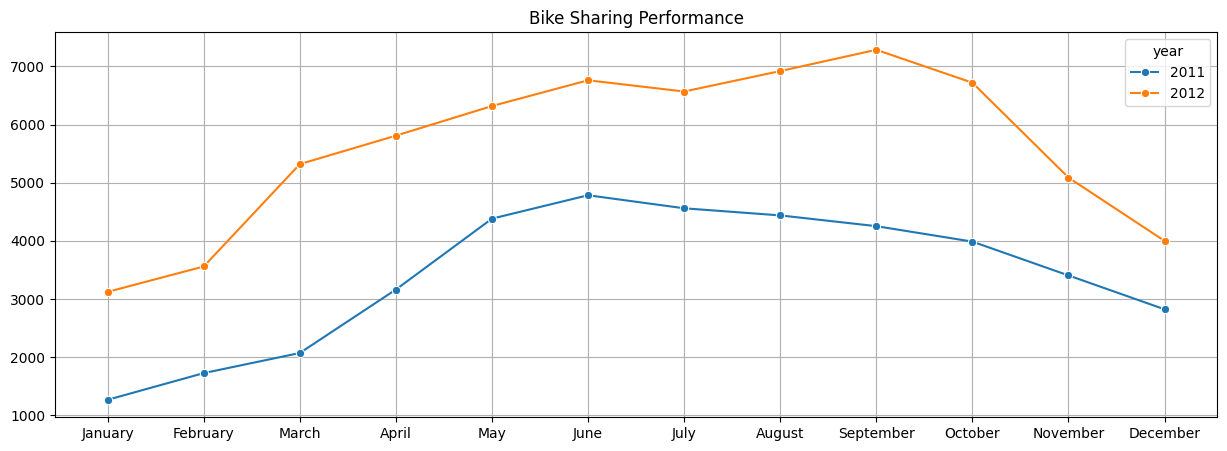

In [48]:
fig , ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=all_data, x='month_day', y='count_day', hue='year_day', marker='o', errorbar=None)
ax.set_title('Bike Sharing Performance')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title='year')
ax.grid()
plt.show()

### Hour.csv

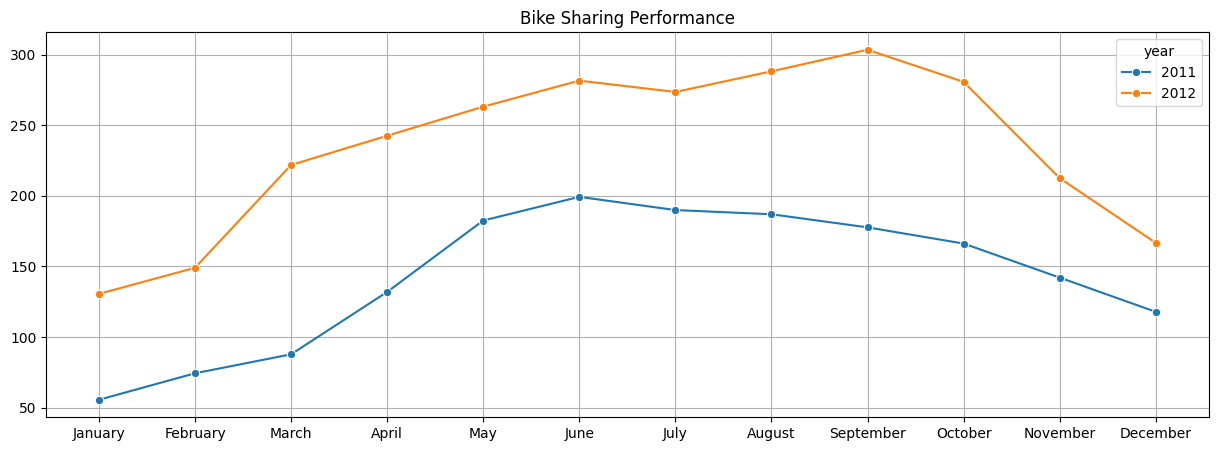

In [49]:
fig , ax = plt.subplots(figsize=(15,5))
sns.lineplot(data=all_data, x='month_hour', y='count_hour', hue='year_hour', marker='o', errorbar=None)
ax.set_title('Bike Sharing Performance')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title='year')
ax.grid()
plt.show()

## Insight :

Tahun 2012 mengalami kenaikan yang pesat dibandingkan pada tahun 2011

Pada tahun 2011 bulan Januari hingga Mei mengalami kenaikan jumlah penyewan sepeda secara signifikan. Bulan Juni Hingga Desember mengalami penuruan secara signifikan.

Pada tahun 2012 bulan Januari hingga Mei mengalami kenaikan jumlah penyewan sepeda secara signifikan. Bulan Juni mengalami penuruan, lalu Bulan Juni mengalami kenaikan lagi hingga bulan Agustus. Bulan september mengalami penurunan hingga bulan Desember.


## Pertanyaan 2:

### Day.csv

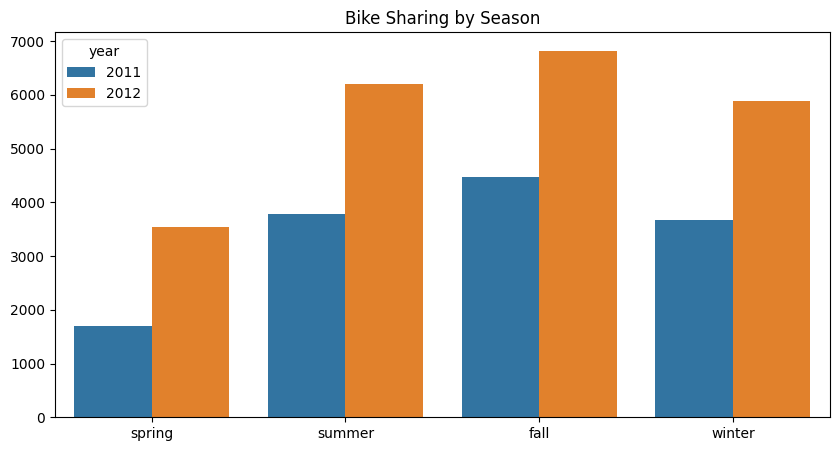

In [50]:
fig , ax = plt.subplots(figsize=(10,5))

sns.barplot(data=all_data, x='season_day', y='count_day', hue='year_day', errorbar=None)
ax.set_title('Bike Sharing by Season')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title='year')
plt.show()

### Hour.csv

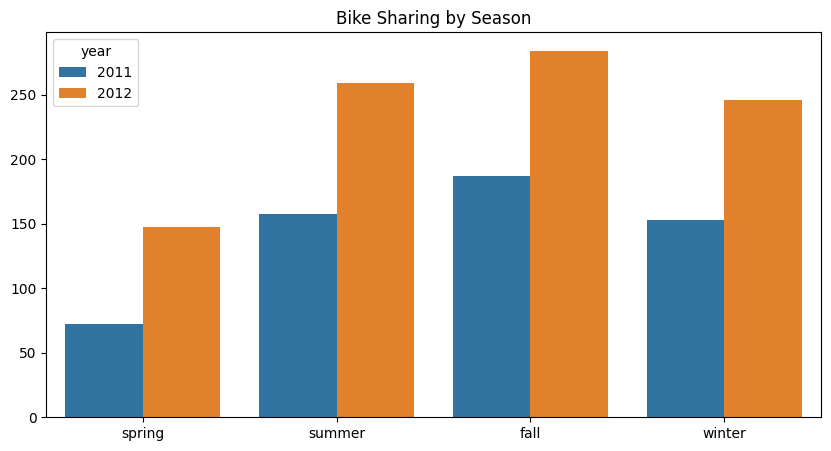

In [51]:
fig , ax = plt.subplots(figsize=(10,5))

sns.barplot(data=all_data, x='season_hour', y='count_hour', hue='year_hour', errorbar=None)
ax.set_title('Bike Sharing by Season')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title='year')
plt.show()

### **Insight :**
- Tahun 2011, musim gugur menjadi jumlah penyewaan sepeda tertinggi sedangkan terendah tetap pada musim gugur
- Tahun 2011 ke tahun 2012, mengalami kenaikan penyewaan sepeda
- Tahun 2012, musim gugur tetap menjadi jumlah penyewaan sepeda tertinggi sedangkan terendah tetap pada musim gugur

## Pertanyaan 3 :

### Day.csv

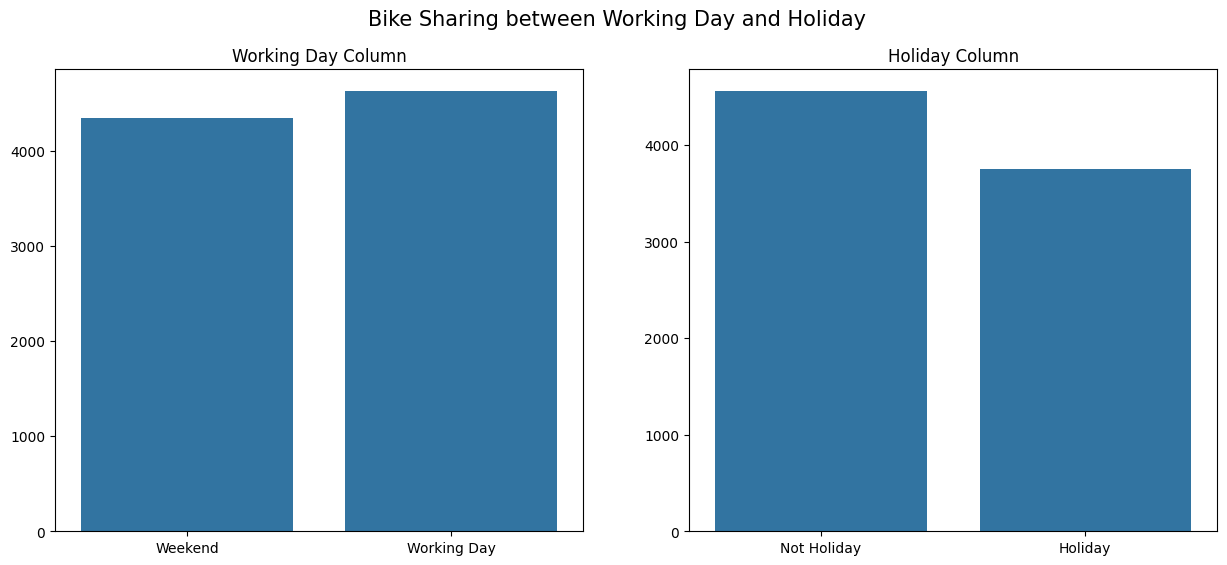

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(data=all_data, x='workingday_day', y='count_day', errorbar=None, ax=ax[0])
ax[0].set_title('Working Day Column')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

sns.barplot(data=all_data, x='holiday_day', y='count_day', errorbar=None, ax=ax[1])
ax[1].set_title('Holiday Column')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.suptitle('Bike Sharing between Working Day and Holiday', fontsize=15)
plt.show()


### Hour.csv

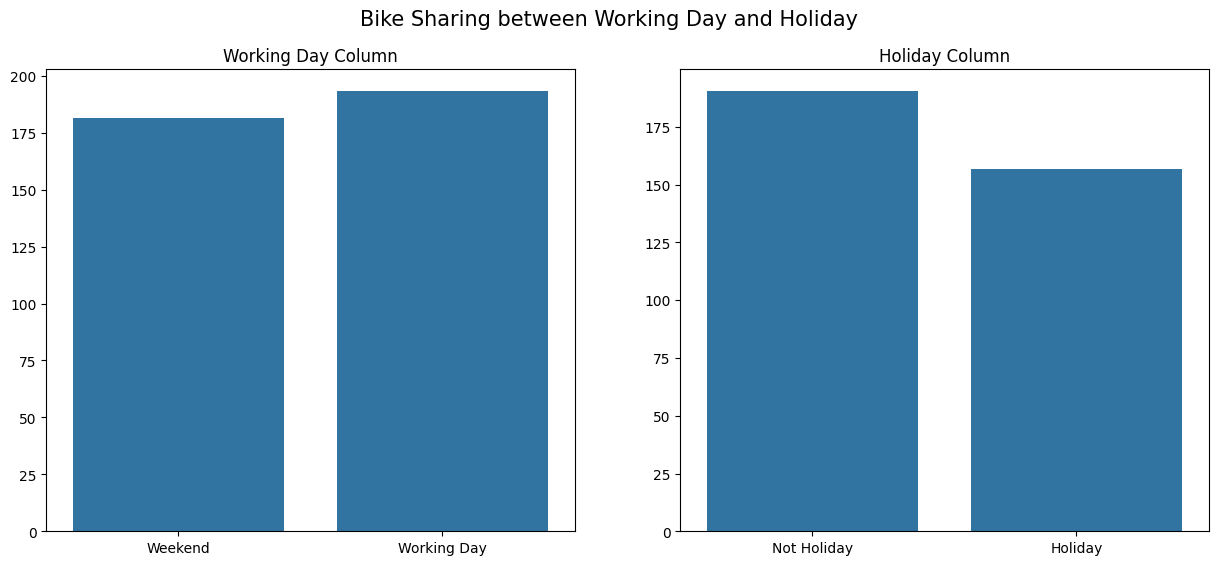

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(data=all_data, x='workingday_hour', y='count_hour', errorbar=None, ax=ax[0])
ax[0].set_title('Working Day Column')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

sns.barplot(data=all_data, x='holiday_hour', y='count_hour', errorbar=None, ax=ax[1])
ax[1].set_title('Holiday Column')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)

plt.suptitle('Bike Sharing between Working Day and Holiday', fontsize=15)
plt.show()

### Insight :
Penyewaan sepeda tertinggi pada saat hari kerja dan bukan saat hari libur.

## Pertanyaan 4 :

### Day.csv

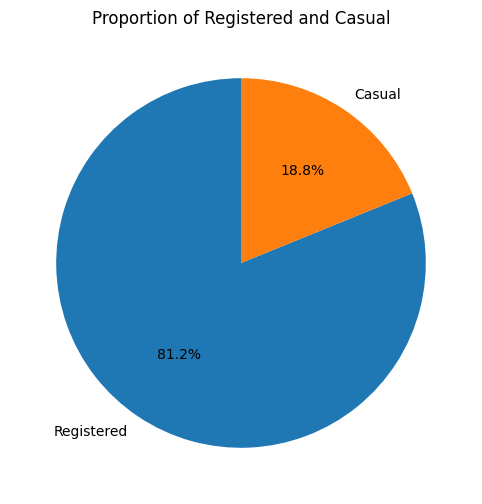

In [58]:
count_registered = all_data['registered_day'].sum()
count_casual     = all_data['casual_day'].sum()

sizes = [count_registered, count_casual]
labels = ['Registered', 'Casual']

plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, startangle=90, autopct= '%1.1f%%')
plt.title('Proportion of Registered and Casual')
plt.show()

### Hour.csv

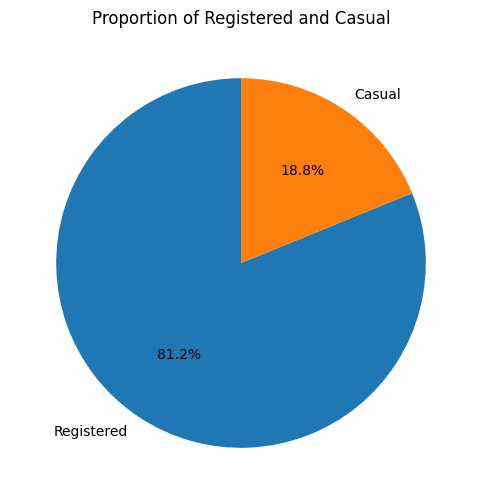

In [55]:
count_registered = all_data['registered_hour'].sum()
count_casual     = all_data['casual_hour'].sum()

sizes = [count_registered, count_casual]
labels = ['Registered', 'Casual']

plt.figure(figsize=(10,6))
plt.pie(sizes, labels=labels, startangle=90, autopct= '%1.1f%%')
plt.title('Proportion of Registered and Casual')
plt.show()

### Insight :
Pengguna secara terdaftar mencatat jumlah penyewaan sepeda sebanyak 81,2% sedangkan pengguna secara kasual mencatat sebanyak 18,8%

## Pertanyaan 5 :

### Day.csv

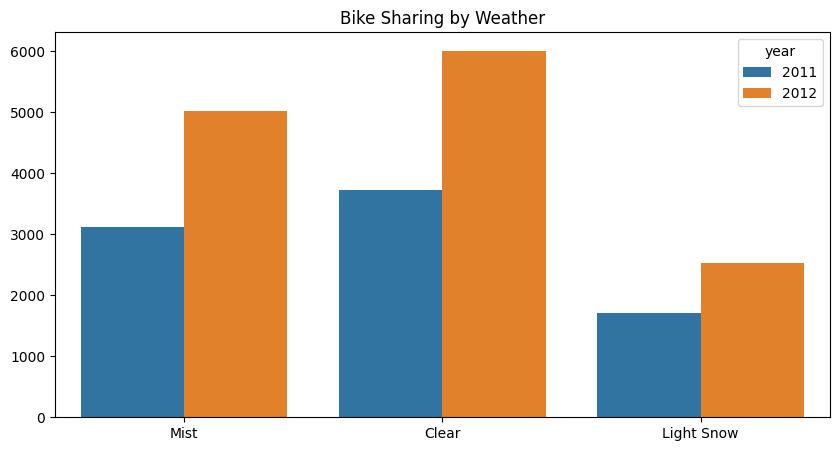

In [56]:
fig , ax = plt.subplots(figsize=(10,5))
sns.barplot(data=all_data, x='weather_day', y='count_day', hue='year_day', errorbar=None)
ax.set_title('Bike Sharing by Weather')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title='year')
plt.show()

### **Insight :**
- Tahun 2011 dan Tahun 2012, jumlah penyewaan sepeda pada cuaca cerah menjadi jumlah yang tertinggi, sedangkan terendah pada salju ringan.
- Tahun 2011 ke tahun 2012 mengalami kenaikan jumlah penyewaan.

### Hour.csv

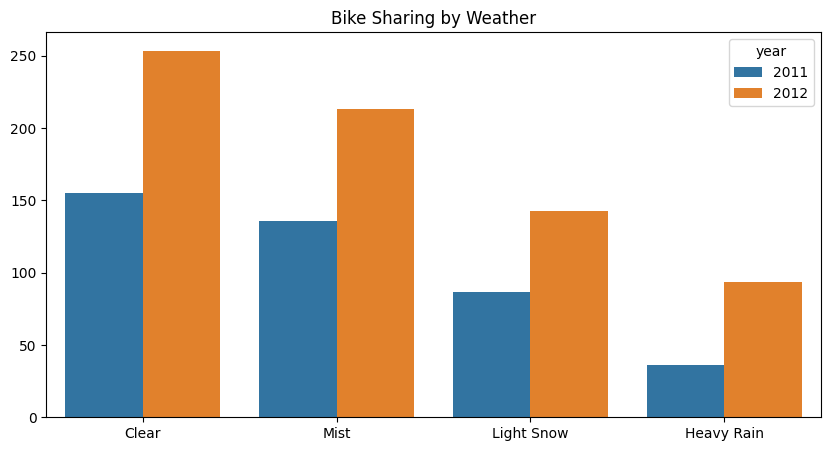

In [57]:
fig , ax = plt.subplots(figsize=(10,5))
sns.barplot(data=all_data, x='weather_hour', y='count_hour', hue='year_hour', errorbar=None)
ax.set_title('Bike Sharing by Weather')
ax.set_xlabel(None)
ax.set_ylabel(None)
ax.legend(title='year')
plt.show()

### **Insight :**
- Tahun 2011 dan Tahun 2012, jumlah penyewaan sepeda pada cuaca cerah menjadi jumlah yang tertinggi, sedangkan terendah pada cuaca badai.
- Tahun 2011 ke tahun 2012 mengalami kenaikan jumlah penyewaan.

# Conslusion

## Pertanyaan 1 :


Pada tahun 2011, jumlah penyewaan sepeda meningkat tajam dari Januari hingga Mei, namun menunjukkan penurunan yang signifikan mulai Juni hingga Desember. Di sisi lain, tahun 2012 mencatat tren yang lebih dinamis, dengan peningkatan tajam dari Januari hingga Mei, penurunan pada Juni, diikuti lonjakan kembali hingga Agustus, sebelum akhirnya menurun secara konsisten dari September hingga Desember.


## Pertanyaan 2 :

Penyewaan sepeda tahun 2012 mengalami peningkatan secara keseluruhan dibandingkan tahun 2011. Musim gugur menjadi musim yang paling banyak diminati oleh pengguna untuk menyewa sepeda, lalu diikuti musim panas. Musim dingin menjadi musim yang paling sedikit pengguna menyewa sepeda.

## Pertanyaan 3 :

Hari kerja ataupun hari libur mencatat pengguna banyak menggunakan sepeda, hal tersebut dikarenakan para pengguna menggunakan sepeda sebagai alat transportasi untuk berangkat kerja.

## Pertanyaan 4 :

Pengguna secara terdaftar lebih banyak dibandingkan pengguna secara kasual, alasan tersebut dikarenakan pengguna secara rutin menyewa sepeda sebagai alat transportasi untuk berangkat kerja. Penggunaan secara terdaftar akan lebih mudah untuk para pekerja yang menggunakan sepeda secara rutin dibandingkan secara kasual.

## Pertanyaan 5 :

Cuaca cerah mencatat jumlah penyewaan sepeda tertinggi. Hal tersebut dikarenakan menggunakan sepeda saat cuaca cerah akan lebih nyaman dan tidak halangan dibandingkan saat cuaca hujan badai yang membuat para pengguna susah untuk merasakan kenyamanan saat menggunakan sepeda.

# Convert Data :

In [66]:
# all_data.to_csv("dashboard.csv", index=False)